<a href="https://colab.research.google.com/github/Anjali001/Convolutional-Neural-Network/blob/master/Fashion_Mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Fashion - MNIST dataset is present in Keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
## Use https://keras.io/datasets/ 
samples=fashion_mnist.load_data()
type(samples)
## This dataset is a set of 2 tuples. One for Training and other for testing
(Train_samples,Train_targets),(Test_samples,Test_targets)=samples
# Step 1 : Know your data
print(len(Train_samples))
print(Train_samples.shape)
print(len(Train_targets))
print(Train_targets.shape)
print(len(Test_samples))
print(Test_samples.shape)
print(len(Test_targets))
print(Test_targets.shape)
print(np.amax(Train_samples)) # Max value
print(np.amin(Train_samples))#Min Value

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step
60000
(60000, 28, 28)
60000
(60000,)
10000
(10000, 28, 28)
10000
(10000,)
255
0


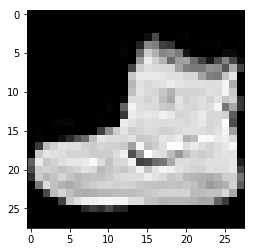

Label of image is 9


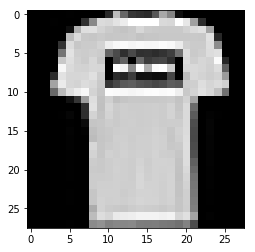

Label of image is 0


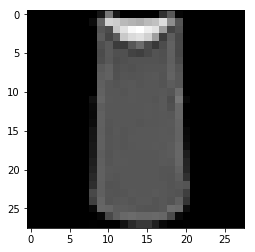

Label of image is 0


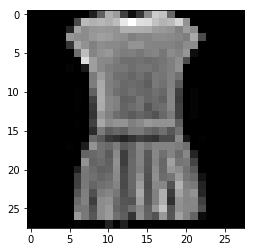

Label of image is 3


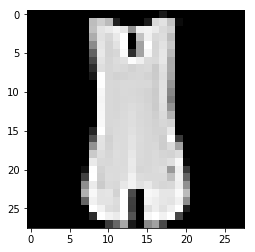

Label of image is 0


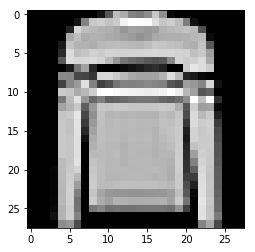

Label of image is 2


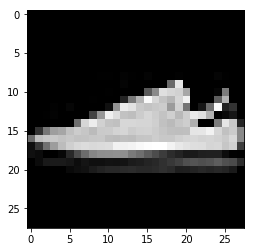

Label of image is 7


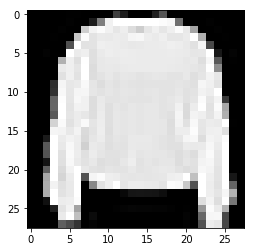

Label of image is 2


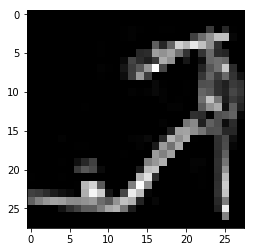

Label of image is 5


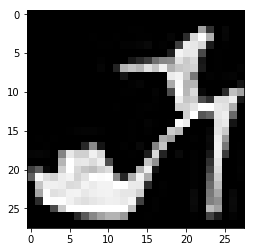

Label of image is 5


In [2]:
# Step 2 : See how data looks like
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(10):
  pixels = Train_samples[i] # Shape (28, 28)
  plt.imshow(pixels, cmap='gray')
  plt.show()
  print('Label of image is', Train_targets[i])

In [0]:
# Step 3 : Reshape the data . 1 at last signifies that it's a grey scale image. 3 is used for RGB images.
Train_samples=Train_samples.reshape(Train_samples.shape[0], 28, 28, 1)
Test_samples =Test_samples.reshape(Test_samples.shape[0], 28, 28, 1)

In [0]:
# Step 4 : Scaling the input features between 0-1
Train_samples=Train_samples/255
Test_samples =Test_samples/255

In [0]:
# Step 6 : One-Hot Encoding
from keras.utils import to_categorical
Train_targets = to_categorical(Train_targets,num_classes=10)
Test_targets = to_categorical(Test_targets,num_classes=10)


In [6]:
# Step 7 : Creating the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss=['categorical_crossentropy'],metrics=['accuracy'])


W0730 12:42:10.133916 139770949269376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 12:42:10.176303 139770949269376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 12:42:10.184898 139770949269376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0730 12:42:10.240684 139770949269376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0730 12:42:10.247315 139770949269376 deprecation_wrapp

In [7]:
# Step 8 : Understanding the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [8]:
# Step 9 : Training the model
model.fit(Train_samples,Train_targets, validation_split = 0.1, epochs=10, batch_size=1000,verbose=1)


W0730 12:42:10.542888 139770949269376 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 133s 2ms/step - loss: 0.7510 - acc: 0.7331 - val_loss: 0.4229 - val_acc: 0.8443
Epoch 2/10
54000/54000 [==============================] - 132s 2ms/step - loss: 0.4151 - acc: 0.8524 - val_loss: 0.3416 - val_acc: 0.8775
Epoch 3/10
54000/54000 [==============================] - 132s 2ms/step - loss: 0.3458 - acc: 0.8770 - val_loss: 0.3050 - val_acc: 0.8845
Epoch 4/10
54000/54000 [==============================] - 131s 2ms/step - loss: 0.3131 - acc: 0.8877 - val_loss: 0.2855 - val_acc: 0.8938
Epoch 5/10
54000/54000 [==============================] - 132s 2ms/step - loss: 0.2879 - acc: 0.8960 - val_loss: 0.2600 - val_acc: 0.9060
Epoch 6/10
54000/54000 [==============================] - 133s 2ms/step - loss: 0.2638 - acc: 0.9052 - val_loss: 0.2569 - val_acc: 0.9053
Epoch 7/10
54000/54000 [==============================] - 131s 2ms/step - loss: 0.2489 - acc: 0.9098 - val_loss: 0.2402 - v

In [9]:
# Step 10 : Testing the model
testing=model.evaluate(Test_samples,Test_targets)
print("\n%s: %.2f%%" % (model.metrics_names[1]+'uracy of Model on testing data', testing[1]*100))

10000/10000 [==============================] - 8s 819us/step

accuracy of Model on testing data: 91.45%


In [10]:
#Step 11 : Evaluate teh model 
##Compute a confusion matrix for each class or sample (0-9)
from sklearn.metrics import multilabel_confusion_matrix 
predictions=np.round(model.predict(Test_samples))
print(multilabel_confusion_matrix(Test_targets,predictions))

[[[8905   95]
  [ 161  839]]

 [[8996    4]
  [  28  972]]

 [[8883  117]
  [ 145  855]]

 [[8907   93]
  [  77  923]]

 [[8868  132]
  [ 148  852]]

 [[8990   10]
  [  16  984]]

 [[8810  190]
  [ 284  716]]

 [[8936   64]
  [  16  984]]

 [[8982   18]
  [  25  975]]

 [[8985   15]
  [  52  948]]]
